In [1]:
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [2]:
df_original = pd.read_csv('apartment_dotcom.csv')

In [3]:
df = df_original.copy()

In [4]:
df.head()

,Unnamed: 0,url,listingid,ZIP,Monthly Rent,Bedrooms,Bathrooms,Square Feet,walkScore,transitScore,Deposit,latitude,longitude,Pet,neighborhood
0,0,https://www.apartments.com/2372-beckwith-dr-in...,ze0jqwy,46218.000,$751,2 bd,1 ba,679 sq ft,25,33,$705 deposit,39.801,-86.126,0.000,Martindale-Brightwood
1,1,https://www.apartments.com/the-marott-apartmen...,cqv6bmf,46208.000,"$1,185 - $1,645",1 - 2 bd,1 - 2 ba,"609 - 1,092 sq ft",54,52,NaN,39.805,-86.156,NaN,Mapleton Fall Creek
2,2,https://www.apartments.com/trails-at-lakeside-...,p38me3t,46220.000,"$1,193 - $2,805",1 - 3 bd,1 - 2 ba,"594 - 1,246 sq ft",20,12,NaN,39.856,-86.101,NaN,Millersville
3,3,https://www.apartments.com/7491-n-shadeland-av...,s34dq64,46250.000,"$1,795",3 bd,2 ba,"2,500 sq ft",54,33,NaN,39.890,-86.045,NaN,I-69 Fall Creek
4,4,https://www.apartments.com/nice-3-bedroom-ranc...,n669z9m,46237.000,"$1,095",3 bd,1 ba,"1,439 sq ft",29,32,NaN,39.722,-86.121,NaN,University Heights


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 704 entries, 0 to 703
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    704 non-null    int64  
 1   url           704 non-null    object 
 2   listingid     693 non-null    object 
 3   ZIP           693 non-null    float64
 4   Monthly Rent  680 non-null    object 
 5   Bedrooms      680 non-null    object 
 6   Bathrooms     680 non-null    object 
 7   Square Feet   664 non-null    object 
 8   walkScore     693 non-null    object 
 9   transitScore  693 non-null    object 
 10  Deposit       162 non-null    object 
 11  latitude      693 non-null    float64
 12  longitude     693 non-null    float64
 13  Pet           36 non-null     float64
 14  neighborhood  693 non-null    object 
dtypes: float64(4), int64(1), object(10)
memory usage: 82.6+ KB


In [6]:
df.describe()

,Unnamed: 0,ZIP,latitude,longitude,Pet
count,704.000,693.000,693.000,693.000,36.000
mean,351.500,46220.284,39.789,-86.144,0.000
std,203.372,30.687,0.075,0.091,0.000
min,0.000,46038.000,39.627,-86.344,0.000
25%,175.750,46204.000,39.752,-86.201,0.000
50%,351.500,46222.000,39.790,-86.144,0.000
75%,527.250,46237.000,39.838,-86.086,0.000
max,703.000,46298.000,39.946,-85.950,0.000


In [7]:
#size of the data
df.shape

(704, 15)

In [8]:
#check how many duplicated columns
df.duplicated().value_counts()

False    704
dtype: int64

In [9]:
df.columns

Index(['Unnamed: 0', 'url', 'listingid', 'ZIP', 'Monthly Rent', 'Bedrooms',
       'Bathrooms', 'Square Feet', 'walkScore', 'transitScore', 'Deposit',
       'latitude', 'longitude', 'Pet', 'neighborhood'],
      dtype='object')

In [10]:
#Drop the column Unnamed:0 sinceit is the same with index column 

df.drop(columns=["Unnamed: 0"], inplace=True)

In [11]:
df.head()

,url,listingid,ZIP,Monthly Rent,Bedrooms,Bathrooms,Square Feet,walkScore,transitScore,Deposit,latitude,longitude,Pet,neighborhood
0,https://www.apartments.com/2372-beckwith-dr-in...,ze0jqwy,46218.000,$751,2 bd,1 ba,679 sq ft,25,33,$705 deposit,39.801,-86.126,0.000,Martindale-Brightwood
1,https://www.apartments.com/the-marott-apartmen...,cqv6bmf,46208.000,"$1,185 - $1,645",1 - 2 bd,1 - 2 ba,"609 - 1,092 sq ft",54,52,NaN,39.805,-86.156,NaN,Mapleton Fall Creek
2,https://www.apartments.com/trails-at-lakeside-...,p38me3t,46220.000,"$1,193 - $2,805",1 - 3 bd,1 - 2 ba,"594 - 1,246 sq ft",20,12,NaN,39.856,-86.101,NaN,Millersville
3,https://www.apartments.com/7491-n-shadeland-av...,s34dq64,46250.000,"$1,795",3 bd,2 ba,"2,500 sq ft",54,33,NaN,39.890,-86.045,NaN,I-69 Fall Creek
4,https://www.apartments.com/nice-3-bedroom-ranc...,n669z9m,46237.000,"$1,095",3 bd,1 ba,"1,439 sq ft",29,32,NaN,39.722,-86.121,NaN,University Heights


In [12]:
#Rename the columns name inn order to apply pep8 rule

dict = {'listingid': 'listing_id', 'ZIP' : 'zipcode', 'Monthly Rent' : 'monthly_rent', 'Bedrooms':'bedrooms',
       'Bathrooms': 'bathrooms', 'Square Feet': 'square_feet', 'walkScore':'walk_score', 
       'transitScore': 'transit_score', 'Deposit': 'deposit',
       'Pet': 'pet'}


df.rename(columns=dict, inplace=True)

In [13]:
#look at the value counts for each features

for col in df.columns:
    print(col)
    print('--'*20)
    print(df[col].value_counts())
    print('##'*20)

url
----------------------------------------
https://www.apartments.com/10481-lookout-lane-indianapolis-in/g65lrwx/        1
https://www.apartments.com/430-indiana-ave-indianapolis-in/xnvhneq/           1
https://www.apartments.com/6515-knobstone-way-indianapolis-in/wjmp3cj/        1
https://www.apartments.com/g-bloc-urban-lofts-indianapolis-in/9jkpjf6/        1
https://www.apartments.com/11417-stoeppelwerth-dr-indianapolis-in/qc2q57y/    1
                                                                             ..
https://www.apartments.com/stadium-lofts-flats-indianapolis-in/l2pgtrd/       1
https://www.apartments.com/3159-e-washington-st-indianapolis-in/htnst63/      1
https://www.apartments.com/fountain-lake-villas-indianapolis-in/e55tvvn/      1
https://www.apartments.com/nine-eighteen-indianapolis-in/5h13z5m/             1
https://www.apartments.com/a-62-indianapolis-in/bdbc678/                      1
Name: url, Length: 704, dtype: int64
######################################

In [14]:
df.head(2)

,url,listing_id,zipcode,monthly_rent,bedrooms,bathrooms,square_feet,walk_score,transit_score,deposit,latitude,longitude,pet,neighborhood
0,https://www.apartments.com/2372-beckwith-dr-in...,ze0jqwy,46218.000,$751,2 bd,1 ba,679 sq ft,25,33,$705 deposit,39.801,-86.126,0.000,Martindale-Brightwood
1,https://www.apartments.com/the-marott-apartmen...,cqv6bmf,46208.000,"$1,185 - $1,645",1 - 2 bd,1 - 2 ba,"609 - 1,092 sq ft",54,52,NaN,39.805,-86.156,NaN,Mapleton Fall Creek


In [15]:
#get 5 digits zipcode

df.zipcode = df.zipcode.astype(str).str.extract('(\d+)')

In [16]:
df.head()

,url,listing_id,zipcode,monthly_rent,bedrooms,bathrooms,square_feet,walk_score,transit_score,deposit,latitude,longitude,pet,neighborhood
0,https://www.apartments.com/2372-beckwith-dr-in...,ze0jqwy,46218,$751,2 bd,1 ba,679 sq ft,25,33,$705 deposit,39.801,-86.126,0.000,Martindale-Brightwood
1,https://www.apartments.com/the-marott-apartmen...,cqv6bmf,46208,"$1,185 - $1,645",1 - 2 bd,1 - 2 ba,"609 - 1,092 sq ft",54,52,NaN,39.805,-86.156,NaN,Mapleton Fall Creek
2,https://www.apartments.com/trails-at-lakeside-...,p38me3t,46220,"$1,193 - $2,805",1 - 3 bd,1 - 2 ba,"594 - 1,246 sq ft",20,12,NaN,39.856,-86.101,NaN,Millersville
3,https://www.apartments.com/7491-n-shadeland-av...,s34dq64,46250,"$1,795",3 bd,2 ba,"2,500 sq ft",54,33,NaN,39.890,-86.045,NaN,I-69 Fall Creek
4,https://www.apartments.com/nice-3-bedroom-ranc...,n669z9m,46237,"$1,095",3 bd,1 ba,"1,439 sq ft",29,32,NaN,39.722,-86.121,NaN,University Heights


In [17]:
df.shape

(704, 14)

In [18]:
df.sample(5)

,url,listing_id,zipcode,monthly_rent,bedrooms,bathrooms,square_feet,walk_score,transit_score,deposit,latitude,longitude,pet,neighborhood
353,https://www.apartments.com/abbey-apartments-af...,x2rdk3p,46221,$778,1 bd,1 ba,535 sq ft,33,22,$652 deposit,39.706,-86.241,NaN,Mars Hill
72,https://www.apartments.com/serenity-manor-inde...,rh4lxt1,46219,"$600 - $1,075",Studio - 2 bd,1 - 2 ba,430 - 800 sq ft,47,0,$150 deposit,39.786,-86.048,NaN,Warren Park
247,https://www.apartments.com/4322-n-edmondson-av...,qt5evyy,46226,"$1,050",3 bd,1 ba,"1,000 sq ft",28,32,"$1,050 deposit",39.836,-86.052,NaN,Devington
649,https://www.apartments.com/10481-lookout-lane-...,g65lrwx,46234,NaN,NaN,NaN,NaN,5,0,NaN,39.799,-86.337,NaN,Indianapolis
648,https://www.apartments.com/near-eastside-4br-h...,2kkgebb,46201,$775,4 bd,1 ba,"1,794 sq ft",48,36,NaN,39.784,-86.106,NaN,Near Eastside


In [19]:
df.head(2)

,url,listing_id,zipcode,monthly_rent,bedrooms,bathrooms,square_feet,walk_score,transit_score,deposit,latitude,longitude,pet,neighborhood
0,https://www.apartments.com/2372-beckwith-dr-in...,ze0jqwy,46218,$751,2 bd,1 ba,679 sq ft,25,33,$705 deposit,39.801,-86.126,0.000,Martindale-Brightwood
1,https://www.apartments.com/the-marott-apartmen...,cqv6bmf,46208,"$1,185 - $1,645",1 - 2 bd,1 - 2 ba,"609 - 1,092 sq ft",54,52,NaN,39.805,-86.156,NaN,Mapleton Fall Creek


In [20]:
#check that multi unit listing on monthly_rent column
df.monthly_rent.str.contains('-')

0      False
1       True
2       True
3      False
4      False
       ...  
699    False
700     True
701    False
702     True
703    False
Name: monthly_rent, Length: 704, dtype: object

In [21]:
#count multi unit listing on monthly_rent
df.monthly_rent.str.contains('-').value_counts()

False    365
True     315
Name: monthly_rent, dtype: int64

In [22]:
#split multi unit listing into two dataframes
df_dirty_1 = df[df.monthly_rent.str.contains('-')== True]
df_dirty_2 = df[df.monthly_rent.str.contains('-')== True]
df_dirty_1.sample(5)

,url,listing_id,zipcode,monthly_rent,bedrooms,bathrooms,square_feet,walk_score,transit_score,deposit,latitude,longitude,pet,neighborhood
504,https://www.apartments.com/lockerbie-lofts-ind...,1ey5td7,46202,"$1,326 - $3,231",Studio - 2 bd,1 - 2.5 ba,"585 - 1,566 sq ft",-,-,NaN,39.774,-86.146,NaN,Lockerbie Square
513,https://www.apartments.com/the-timbers-apartme...,x76zrsq,46237,"$1,378 - $1,859",1 - 3 bd,1 - 2 ba,"702 - 1,500 sq ft",25,22,NaN,39.638,-86.091,NaN,South Perry
24,https://www.apartments.com/north-haven-of-carm...,5vpm6np,46280,"$1,309 - $3,148",1 - 3 bd,1 - 2 ba,"694 - 1,213 sq ft",21,0,$150 deposit,39.932,-86.091,NaN,Indianapolis
389,https://www.apartments.com/center-point-apartm...,04cdkh2,46214,"$1,100 - $2,105",1 - 3 bd,1 - 2 ba,"700 - 1,291 sq ft",21,36,NaN,39.819,-86.276,NaN,Eagle Creek
274,https://www.apartments.com/madison-lofts-india...,zpq104w,46225,"$785 - $1,324",1 - 2 bd,1 ba,583 - 929 sq ft,50,35,NaN,39.748,-86.155,NaN,Near Southside


In [23]:
#extract only digits without "," on the first dataframe after splitting multi unit listing
df_dirty_1.monthly_rent.str.split('-').str[0].str.replace(',', '').str.extract('(\d+)')

,0
1,1185
2,1193
10,750
11,860
12,549
...,...
693,899
696,995
697,735
700,999


In [24]:
#override the monthly_rent column with the first entries of the multi unit listing and extract only numbers
df_dirty_1['monthly_rent'] = df_dirty_1.monthly_rent.str.split('-').str[0].str.replace(',', '').str.extract('(\d+)')

In [25]:
df_dirty_1

,url,listing_id,zipcode,monthly_rent,bedrooms,bathrooms,square_feet,walk_score,transit_score,deposit,latitude,longitude,pet,neighborhood
1,https://www.apartments.com/the-marott-apartmen...,cqv6bmf,46208,1185,1 - 2 bd,1 - 2 ba,"609 - 1,092 sq ft",54,52,NaN,39.805,-86.156,NaN,Mapleton Fall Creek
2,https://www.apartments.com/trails-at-lakeside-...,p38me3t,46220,1193,1 - 3 bd,1 - 2 ba,"594 - 1,246 sq ft",20,12,NaN,39.856,-86.101,NaN,Millersville
10,https://www.apartments.com/waterfront-terrace-...,pr9m19s,46224,750,1 - 3 bd,1 - 2 ba,"648 - 1,034 sq ft",26,34,NaN,39.818,-86.247,NaN,Eagledale
11,https://www.apartments.com/circle-city-apartme...,xbcddnp,46202,860,Studio - 2 bd,1 - 2.5 ba,"376 - 1,700 sq ft",62,57,NaN,39.785,-86.157,NaN,Near Northside
12,https://www.apartments.com/cloverleaf-apartmen...,11b7pf4,46241,549,1 - 3 bd,1 - 1.5 ba,"586 - 1,240 sq ft",43,33,NaN,39.754,-86.261,NaN,Garden City
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693,https://www.apartments.com/scandia-apartments-...,9er4df5,46250,899,1 - 3 bd,1 - 2.5 ba,"780 - 1,759 sq ft",35,0,NaN,39.922,-86.071,NaN,Castleton
696,https://www.apartments.com/ayr-indianapolis-in...,fkdb8hv,46220,995,Studio - 2 bd,1 - 2 ba,"508 - 1,177 sq ft",51,33,$250 deposit,39.866,-86.117,NaN,Glendale
697,https://www.apartments.com/the-avenue-indianap...,z394tby,46202,735,Studio - 4 bd,1 - 4 ba,"362 - 1,620 sq ft",64,47,NaN,39.781,-86.174,NaN,Circle City
700,https://www.apartments.com/the-lodge-at-trails...,1wp4yw6,46240,999,1 - 2 bd,1 - 2 ba,"652 - 1,084 sq ft",32,18,NaN,39.925,-86.138,NaN,Nora Far Northside


In [26]:
#override the bedrooms column with the first entries of the multi unit listing and extract only numbers

df_dirty_1['bedrooms'] = df_dirty_1.bedrooms.str.split('-').str[0].str.extract('(\w+)')


In [27]:
#value count the bedrooms
df_dirty_1.bedrooms.value_counts()

1         198
Studio     94
2          23
Name: bedrooms, dtype: int64

In [28]:
df_dirty_1.sample(5)

,url,listing_id,zipcode,monthly_rent,bedrooms,bathrooms,square_feet,walk_score,transit_score,deposit,latitude,longitude,pet,neighborhood
582,https://www.apartments.com/fountain-lake-villa...,e55tvvn,46227,795,1,1 - 2 ba,"777 - 1,293 sq ft",69,32,$200 deposit,39.639,-86.122,NaN,South Perry
257,https://www.apartments.com/northwoods-apartmen...,3cnsc5d,46234,640,Studio,1 ba,415 - 800 sq ft,31,30,NaN,39.776,-86.324,NaN,Chapel Hill Ben Davis
357,https://www.apartments.com/sebring-court-india...,z2q88qw,46224,530,1,1 - 2.5 ba,"467 - 1,237 sq ft",12,28,NaN,39.792,-86.272,NaN,Indianapolis
537,https://www.apartments.com/cherry-glen-indiana...,rlyeph3,46227,659,Studio,1 - 2 ba,288 - 864 sq ft,43,29,$350 deposit,39.710,-86.116,NaN,University Heights
28,https://www.apartments.com/alpine-studios-indi...,0mdymh2,46221,745,Studio,1 - 2 ba,372 - 992 sq ft,24,20,NaN,39.699,-86.262,NaN,Valley Mills


In [29]:
#Change the type of bathrooms column after getting the first entries of the multi unit listing and extract only numbers
df_dirty_1.bathrooms.str.split('-').str[0].str.extract('(\S+)').astype('float')

,0
1,1.000
2,1.000
10,1.000
11,1.000
12,1.000
...,...
693,1.000
696,1.000
697,1.000
700,1.000


In [30]:
#Value counts on each entries of bathrooms column

df_dirty_1.bathrooms.str.split('-').str[0].str.extract('(\S+)').astype('float').value_counts()

1.000    302
1.500      6
2.000      3
2.500      3
0.500      1
dtype: int64

In [31]:
#Update the clean bathroom column 
df_dirty_1['bathrooms']=df_dirty_1.bathrooms.str.split('-').str[0].str.extract('(\S+)').astype('float')

In [32]:
df_dirty_1.sample(5)

,url,listing_id,zipcode,monthly_rent,bedrooms,bathrooms,square_feet,walk_score,transit_score,deposit,latitude,longitude,pet,neighborhood
663,https://www.apartments.com/cross-creek-apartme...,0zh5801,46254,715,1,1.000,510 - 910 sq ft,41,25,NaN,39.858,-86.243,NaN,Snacks Guion Creek
81,https://www.apartments.com/747-apartments-indi...,277cs0c,46202,2062,1,1.000,"687 - 1,689 sq ft",86,52,NaN,39.777,-86.145,NaN,Chatham Arch
73,https://www.apartments.com/five-twenty-virgini...,tf7y05c,46203,1069,1,1.000,"650 - 1,044 sq ft",80,60,NaN,39.759,-86.147,NaN,Fletcher Place
590,https://www.apartments.com/riley-towers-indian...,d3q3fkh,46204,927,Studio,1.000,"355 - 2,000 sq ft",93,59,NaN,39.776,-86.153,NaN,Circle City
456,https://www.apartments.com/the-lakes-of-george...,2qh9feb,46268,815,1,1.000,"718 - 1,179 sq ft",29,25,NaN,39.871,-86.243,NaN,Augusta


Apply the same process that is explained above on square_feet column

In [33]:
df_dirty_1['square_feet'].str.split('-').str[0].str.replace(',', '').str.extract('(\S+)').astype('float')

,0
1,609.000
2,594.000
10,648.000
11,376.000
12,586.000
...,...
693,780.000
696,508.000
697,362.000
700,652.000


In [34]:
df_dirty_1['square_feet'] = df_dirty_1['square_feet'].str.split('-').str[0].str.replace(',', '').str.extract('(\S+)').astype('float')

In [35]:
df_dirty_1.sample()

,url,listing_id,zipcode,monthly_rent,bedrooms,bathrooms,square_feet,walk_score,transit_score,deposit,latitude,longitude,pet,neighborhood
20,https://www.apartments.com/avia-lofts-at-found...,deszx0j,46268,805,Studio,1.000,480.000,59,32,NaN,39.913,-86.222,NaN,College Park


Now, we will work on the second datafram that was created after splittibg the multi unit listing.
In this dataframe we consider the second component of the multi unit listing and apply the same
cleaning methods as we did on df_dirty_1 dataframe.

In [36]:
df_dirty_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 315 entries, 1 to 702
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   url            315 non-null    object 
 1   listing_id     315 non-null    object 
 2   zipcode        315 non-null    object 
 3   monthly_rent   315 non-null    object 
 4   bedrooms       315 non-null    object 
 5   bathrooms      315 non-null    object 
 6   square_feet    314 non-null    object 
 7   walk_score     315 non-null    object 
 8   transit_score  315 non-null    object 
 9   deposit        47 non-null     object 
 10  latitude       315 non-null    float64
 11  longitude      315 non-null    float64
 12  pet            9 non-null      float64
 13  neighborhood   315 non-null    object 
dtypes: float64(3), object(11)
memory usage: 36.9+ KB


In [37]:
df_dirty_2['monthly_rent']= df_dirty_2.monthly_rent.str.split("-").str[1].str.replace(',', "").str.extract('(\d+)').astype('float')

In [38]:
df_dirty_2.head(2)

,url,listing_id,zipcode,monthly_rent,bedrooms,bathrooms,square_feet,walk_score,transit_score,deposit,latitude,longitude,pet,neighborhood
1,https://www.apartments.com/the-marott-apartmen...,cqv6bmf,46208,1645.000,1 - 2 bd,1 - 2 ba,"609 - 1,092 sq ft",54,52,NaN,39.805,-86.156,NaN,Mapleton Fall Creek
2,https://www.apartments.com/trails-at-lakeside-...,p38me3t,46220,2805.000,1 - 3 bd,1 - 2 ba,"594 - 1,246 sq ft",20,12,NaN,39.856,-86.101,NaN,Millersville


In [39]:
df_dirty_2['bedrooms'] = df_dirty_2.bedrooms.str.split("-").str[1].str.extract("(\S+)")
df_dirty_2["bathrooms"] = df_dirty_2.bathrooms.str.split("-").str[1].str.extract("(\S+)").astype("float")
df_dirty_2["square_feet"] = df_dirty_2.square_feet.str.split("-").str[1].str.replace(",","").str.extract("(\S+)").astype("float")

In [40]:
df_dirty_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 315 entries, 1 to 702
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   url            315 non-null    object 
 1   listing_id     315 non-null    object 
 2   zipcode        315 non-null    object 
 3   monthly_rent   315 non-null    float64
 4   bedrooms       294 non-null    object 
 5   bathrooms      259 non-null    float64
 6   square_feet    300 non-null    float64
 7   walk_score     315 non-null    object 
 8   transit_score  315 non-null    object 
 9   deposit        47 non-null     object 
 10  latitude       315 non-null    float64
 11  longitude      315 non-null    float64
 12  pet            9 non-null      float64
 13  neighborhood   315 non-null    object 
dtypes: float64(6), object(8)
memory usage: 36.9+ KB


In [41]:
#concanete two dataframe that were spliting and create df_clean data frame
df_clean = pd.concat([df_dirty_1, df_dirty_2], axis = 0)

In [42]:
df_clean.head()

,url,listing_id,zipcode,monthly_rent,bedrooms,bathrooms,square_feet,walk_score,transit_score,deposit,latitude,longitude,pet,neighborhood
1,https://www.apartments.com/the-marott-apartmen...,cqv6bmf,46208,1185,1,1.000,609.000,54,52,NaN,39.805,-86.156,NaN,Mapleton Fall Creek
2,https://www.apartments.com/trails-at-lakeside-...,p38me3t,46220,1193,1,1.000,594.000,20,12,NaN,39.856,-86.101,NaN,Millersville
10,https://www.apartments.com/waterfront-terrace-...,pr9m19s,46224,750,1,1.000,648.000,26,34,NaN,39.818,-86.247,NaN,Eagledale
11,https://www.apartments.com/circle-city-apartme...,xbcddnp,46202,860,Studio,1.000,376.000,62,57,NaN,39.785,-86.157,NaN,Near Northside
12,https://www.apartments.com/cloverleaf-apartmen...,11b7pf4,46241,549,1,1.000,586.000,43,33,NaN,39.754,-86.261,NaN,Garden City


Create a new dataframa as df_dirty_3 by using non multi unit listing columns and apply the same 
cleaning methods such as converting float datatype, remove "$", ",", ba, bd and sq ft.
Lastly, we have df_final data frame after concenating all df_clean and df_dirty_3 dataframes

In [43]:

df_dirty_3 = df[df.monthly_rent.str.contains('-')!= True]
df_dirty_3

,url,listing_id,zipcode,monthly_rent,bedrooms,bathrooms,square_feet,walk_score,transit_score,deposit,latitude,longitude,pet,neighborhood
0,https://www.apartments.com/2372-beckwith-dr-in...,ze0jqwy,46218,$751,2 bd,1 ba,679 sq ft,25,33,$705 deposit,39.801,-86.126,0.000,Martindale-Brightwood
3,https://www.apartments.com/7491-n-shadeland-av...,s34dq64,46250,"$1,795",3 bd,2 ba,"2,500 sq ft",54,33,NaN,39.890,-86.045,NaN,I-69 Fall Creek
4,https://www.apartments.com/nice-3-bedroom-ranc...,n669z9m,46237,"$1,095",3 bd,1 ba,"1,439 sq ft",29,32,NaN,39.722,-86.121,NaN,University Heights
5,https://www.apartments.com/1102-n-oakland-ave-...,c4kr5zf,46201,"$1,300",3 bd,1.5 ba,"1,500 sq ft",67,38,$800 deposit,39.783,-86.113,NaN,Near Eastside
6,https://www.apartments.com/634-e-10th-st-india...,rl2dfp0,46202,"$1,600",2 bd,2 ba,"1,400 sq ft",74,53,"$1,600 deposit",39.781,-86.146,NaN,Chatham Arch
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,https://www.apartments.com/442-parkway-ave-ind...,ek8mt7q,46225,"$2,295",4 bd,3 ba,"3,100 sq ft",75,40,"$2,295 deposit",39.749,-86.150,NaN,Bates-Hendricks
698,https://www.apartments.com/1629-hoefgen-street...,hynbrv3,46203,"$1,175",3 bd,2 ba,"1,000 sq ft",38,37,NaN,39.732,-86.131,NaN,Near Southeast
699,https://www.apartments.com/550-fletcher-ave-in...,1jk9p55,46203,"$1,249",2 bd,1.5 ba,"1,030 sq ft",82,65,NaN,39.761,-86.148,NaN,Fletcher Place
701,https://www.apartments.com/8506-westfield-blvd...,nxzxzyn,46240,"$1,855",1 bd,1 ba,788 sq ft,59,30,NaN,39.910,-86.134,NaN,North Central


In [44]:
df_dirty_3['monthly_rent'].str[1:].str.replace(',','')

0       751
3      1795
4      1095
5      1300
6      1600
       ... 
695    2295
698    1175
699    1249
701    1855
703    1700
Name: monthly_rent, Length: 389, dtype: object

In [45]:
df_dirty_3['monthly_rent'] = df_dirty_3['monthly_rent'].str[1:].str.replace(',','')

In [46]:
df_dirty_3.monthly_rent

0       751
3      1795
4      1095
5      1300
6      1600
       ... 
695    2295
698    1175
699    1249
701    1855
703    1700
Name: monthly_rent, Length: 389, dtype: object

In [47]:
df_dirty_3['bedrooms'] = df_dirty_3['bedrooms'].str.extract("(\S+)")

In [48]:
df_dirty_3["bathrooms"] = df_dirty_3.bathrooms.str.extract("(\S+)").astype("float")

In [49]:
df_dirty_3["square_feet"] = df_dirty_3.square_feet.str.replace(",","").str.extract("(\S+)").astype("float")

In [50]:
df_dirty_3

,url,listing_id,zipcode,monthly_rent,bedrooms,bathrooms,square_feet,walk_score,transit_score,deposit,latitude,longitude,pet,neighborhood
0,https://www.apartments.com/2372-beckwith-dr-in...,ze0jqwy,46218,751,2,1.000,679.000,25,33,$705 deposit,39.801,-86.126,0.000,Martindale-Brightwood
3,https://www.apartments.com/7491-n-shadeland-av...,s34dq64,46250,1795,3,2.000,2500.000,54,33,NaN,39.890,-86.045,NaN,I-69 Fall Creek
4,https://www.apartments.com/nice-3-bedroom-ranc...,n669z9m,46237,1095,3,1.000,1439.000,29,32,NaN,39.722,-86.121,NaN,University Heights
5,https://www.apartments.com/1102-n-oakland-ave-...,c4kr5zf,46201,1300,3,1.500,1500.000,67,38,$800 deposit,39.783,-86.113,NaN,Near Eastside
6,https://www.apartments.com/634-e-10th-st-india...,rl2dfp0,46202,1600,2,2.000,1400.000,74,53,"$1,600 deposit",39.781,-86.146,NaN,Chatham Arch
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,https://www.apartments.com/442-parkway-ave-ind...,ek8mt7q,46225,2295,4,3.000,3100.000,75,40,"$2,295 deposit",39.749,-86.150,NaN,Bates-Hendricks
698,https://www.apartments.com/1629-hoefgen-street...,hynbrv3,46203,1175,3,2.000,1000.000,38,37,NaN,39.732,-86.131,NaN,Near Southeast
699,https://www.apartments.com/550-fletcher-ave-in...,1jk9p55,46203,1249,2,1.500,1030.000,82,65,NaN,39.761,-86.148,NaN,Fletcher Place
701,https://www.apartments.com/8506-westfield-blvd...,nxzxzyn,46240,1855,1,1.000,788.000,59,30,NaN,39.910,-86.134,NaN,North Central


In [51]:
df_final = pd.concat([df_dirty_3, df_clean])

In [52]:
df_final

,url,listing_id,zipcode,monthly_rent,bedrooms,bathrooms,square_feet,walk_score,transit_score,deposit,latitude,longitude,pet,neighborhood
0,https://www.apartments.com/2372-beckwith-dr-in...,ze0jqwy,46218,751,2,1.000,679.000,25,33,$705 deposit,39.801,-86.126,0.000,Martindale-Brightwood
3,https://www.apartments.com/7491-n-shadeland-av...,s34dq64,46250,1795,3,2.000,2500.000,54,33,NaN,39.890,-86.045,NaN,I-69 Fall Creek
4,https://www.apartments.com/nice-3-bedroom-ranc...,n669z9m,46237,1095,3,1.000,1439.000,29,32,NaN,39.722,-86.121,NaN,University Heights
5,https://www.apartments.com/1102-n-oakland-ave-...,c4kr5zf,46201,1300,3,1.500,1500.000,67,38,$800 deposit,39.783,-86.113,NaN,Near Eastside
6,https://www.apartments.com/634-e-10th-st-india...,rl2dfp0,46202,1600,2,2.000,1400.000,74,53,"$1,600 deposit",39.781,-86.146,NaN,Chatham Arch
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693,https://www.apartments.com/scandia-apartments-...,9er4df5,46250,1679.000,3,2.500,1759.000,35,0,NaN,39.922,-86.071,NaN,Castleton
696,https://www.apartments.com/ayr-indianapolis-in...,fkdb8hv,46220,1954.000,2,2.000,1177.000,51,33,$250 deposit,39.866,-86.117,NaN,Glendale
697,https://www.apartments.com/the-avenue-indianap...,z394tby,46202,3500.000,4,4.000,1620.000,64,47,NaN,39.781,-86.174,NaN,Circle City
700,https://www.apartments.com/the-lodge-at-trails...,1wp4yw6,46240,1395.000,2,2.000,1084.000,32,18,NaN,39.925,-86.138,NaN,Nora Far Northside


In [53]:
#check the null values on monthly_rent
df_final.monthly_rent.isna().value_counts()

False    995
True      24
Name: monthly_rent, dtype: int64

In [54]:
#check all null values and datatypes of columns
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1019 entries, 0 to 702
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   url            1019 non-null   object 
 1   listing_id     1008 non-null   object 
 2   zipcode        1008 non-null   object 
 3   monthly_rent   995 non-null    object 
 4   bedrooms       974 non-null    object 
 5   bathrooms      939 non-null    float64
 6   square_feet    964 non-null    float64
 7   walk_score     1008 non-null   object 
 8   transit_score  1008 non-null   object 
 9   deposit        209 non-null    object 
 10  latitude       1008 non-null   float64
 11  longitude      1008 non-null   float64
 12  pet            45 non-null     float64
 13  neighborhood   1008 non-null   object 
dtypes: float64(5), object(9)
memory usage: 119.4+ KB


In [55]:
df_final.head()

,url,listing_id,zipcode,monthly_rent,bedrooms,bathrooms,square_feet,walk_score,transit_score,deposit,latitude,longitude,pet,neighborhood
0,https://www.apartments.com/2372-beckwith-dr-in...,ze0jqwy,46218,751,2,1.000,679.000,25,33,$705 deposit,39.801,-86.126,0.000,Martindale-Brightwood
3,https://www.apartments.com/7491-n-shadeland-av...,s34dq64,46250,1795,3,2.000,2500.000,54,33,NaN,39.890,-86.045,NaN,I-69 Fall Creek
4,https://www.apartments.com/nice-3-bedroom-ranc...,n669z9m,46237,1095,3,1.000,1439.000,29,32,NaN,39.722,-86.121,NaN,University Heights
5,https://www.apartments.com/1102-n-oakland-ave-...,c4kr5zf,46201,1300,3,1.500,1500.000,67,38,$800 deposit,39.783,-86.113,NaN,Near Eastside
6,https://www.apartments.com/634-e-10th-st-india...,rl2dfp0,46202,1600,2,2.000,1400.000,74,53,"$1,600 deposit",39.781,-86.146,NaN,Chatham Arch


In [56]:
df_final.bedrooms.value_counts()

3         330
1         249
2         230
Studio    103
4          56
5           6
Name: bedrooms, dtype: int64

In [57]:
#Change studio is 0

In [58]:
df_final.bedrooms.replace('Studio', '0',inplace=True)

In [59]:
df_final.bedrooms.value_counts()

3    330
1    249
2    230
0    103
4     56
5      6
Name: bedrooms, dtype: int64

In [60]:
df_final

,url,listing_id,zipcode,monthly_rent,bedrooms,bathrooms,square_feet,walk_score,transit_score,deposit,latitude,longitude,pet,neighborhood
0,https://www.apartments.com/2372-beckwith-dr-in...,ze0jqwy,46218,751,2,1.000,679.000,25,33,$705 deposit,39.801,-86.126,0.000,Martindale-Brightwood
3,https://www.apartments.com/7491-n-shadeland-av...,s34dq64,46250,1795,3,2.000,2500.000,54,33,NaN,39.890,-86.045,NaN,I-69 Fall Creek
4,https://www.apartments.com/nice-3-bedroom-ranc...,n669z9m,46237,1095,3,1.000,1439.000,29,32,NaN,39.722,-86.121,NaN,University Heights
5,https://www.apartments.com/1102-n-oakland-ave-...,c4kr5zf,46201,1300,3,1.500,1500.000,67,38,$800 deposit,39.783,-86.113,NaN,Near Eastside
6,https://www.apartments.com/634-e-10th-st-india...,rl2dfp0,46202,1600,2,2.000,1400.000,74,53,"$1,600 deposit",39.781,-86.146,NaN,Chatham Arch
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693,https://www.apartments.com/scandia-apartments-...,9er4df5,46250,1679.000,3,2.500,1759.000,35,0,NaN,39.922,-86.071,NaN,Castleton
696,https://www.apartments.com/ayr-indianapolis-in...,fkdb8hv,46220,1954.000,2,2.000,1177.000,51,33,$250 deposit,39.866,-86.117,NaN,Glendale
697,https://www.apartments.com/the-avenue-indianap...,z394tby,46202,3500.000,4,4.000,1620.000,64,47,NaN,39.781,-86.174,NaN,Circle City
700,https://www.apartments.com/the-lodge-at-trails...,1wp4yw6,46240,1395.000,2,2.000,1084.000,32,18,NaN,39.925,-86.138,NaN,Nora Far Northside


In [61]:
df_final.deposit.value_counts()

$250 deposit      25
$200 deposit      22
$500 deposit      15
$300 deposit      14
$350 deposit       7
                  ..
$2,450 deposit     1
$1,745 deposit     1
$950 deposit       1
$1,010 deposit     1
$2,500 deposit     1
Name: deposit, Length: 74, dtype: int64

In [62]:
#check the all unique entries to see what you need to clean
df_final.deposit.unique()

array(['$705 deposit', nan, '$800 deposit', '$1,600 deposit',
       '$825 deposit', '$1,500 deposit', '$1,745 deposit',
       '$1,900 deposit', '$1,750 deposit', '$1,000 deposit',
       '$1,200 deposit', '$1,210 deposit', '$3,000 deposit',
       '$2,085 deposit', '$875 deposit', '$1,100 deposit',
       '$1,998 deposit', '$750 deposit', '$675 deposit', '$2,450 deposit',
       '$1,450 deposit', '$950 deposit', '$1,400 deposit', '$795 deposit',
       '$2,300 deposit', '$1,250 deposit', '$1,800 deposit',
       '$975 deposit', '$1,010 deposit', '$775 deposit', '$1,300 deposit',
       '$250 deposit', '$1,110 deposit', '$1,395 deposit', '$895 deposit',
       '$500 deposit', '$1,350 deposit', '$1,650 deposit',
       '$1,550 deposit', '$2,800 deposit', '$1,050 deposit',
       '$2,100 deposit', '$1,700 deposit', '$850 deposit',
       '$1,795 deposit', '$1,825 deposit', '$700 deposit',
       '$1,645 deposit', '$200 deposit', '$652 deposit', '$1,670 deposit',
       '$2,250 deposit',

In [63]:
df_final.deposit.str[1:].str.replace(',','').str.extract('(\d+)')

,0
0,705
3,NaN
4,NaN
5,800
6,1600
...,...
693,NaN
696,250
697,NaN
700,NaN


In [64]:
#remove "$" and ","
df_final['deposit'] = df_final.deposit.str[1:].str.replace(',','').str.extract('(\d+)')

In [65]:
df_final

,url,listing_id,zipcode,monthly_rent,bedrooms,bathrooms,square_feet,walk_score,transit_score,deposit,latitude,longitude,pet,neighborhood
0,https://www.apartments.com/2372-beckwith-dr-in...,ze0jqwy,46218,751,2,1.000,679.000,25,33,705,39.801,-86.126,0.000,Martindale-Brightwood
3,https://www.apartments.com/7491-n-shadeland-av...,s34dq64,46250,1795,3,2.000,2500.000,54,33,NaN,39.890,-86.045,NaN,I-69 Fall Creek
4,https://www.apartments.com/nice-3-bedroom-ranc...,n669z9m,46237,1095,3,1.000,1439.000,29,32,NaN,39.722,-86.121,NaN,University Heights
5,https://www.apartments.com/1102-n-oakland-ave-...,c4kr5zf,46201,1300,3,1.500,1500.000,67,38,800,39.783,-86.113,NaN,Near Eastside
6,https://www.apartments.com/634-e-10th-st-india...,rl2dfp0,46202,1600,2,2.000,1400.000,74,53,1600,39.781,-86.146,NaN,Chatham Arch
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693,https://www.apartments.com/scandia-apartments-...,9er4df5,46250,1679.000,3,2.500,1759.000,35,0,NaN,39.922,-86.071,NaN,Castleton
696,https://www.apartments.com/ayr-indianapolis-in...,fkdb8hv,46220,1954.000,2,2.000,1177.000,51,33,250,39.866,-86.117,NaN,Glendale
697,https://www.apartments.com/the-avenue-indianap...,z394tby,46202,3500.000,4,4.000,1620.000,64,47,NaN,39.781,-86.174,NaN,Circle City
700,https://www.apartments.com/the-lodge-at-trails...,1wp4yw6,46240,1395.000,2,2.000,1084.000,32,18,NaN,39.925,-86.138,NaN,Nora Far Northside


In [66]:
df_final.shape

(1019, 14)

In [67]:

df_final.monthly_rent.notna().value_counts()

True     995
False     24
Name: monthly_rent, dtype: int64

In [68]:
#check null values for each columns
df_final.isnull().sum()

url                0
listing_id        11
zipcode           11
monthly_rent      24
bedrooms          45
bathrooms         80
square_feet       55
walk_score        11
transit_score     11
deposit          810
latitude          11
longitude         11
pet              974
neighborhood      11
dtype: int64

In [69]:
#get only null values entries on monthly_rent column
df_final[df_final.monthly_rent.notna() == False]

,url,listing_id,zipcode,monthly_rent,bedrooms,bathrooms,square_feet,walk_score,transit_score,deposit,latitude,longitude,pet,neighborhood
45,https://www.apartments.com/available-now-india...,erjz33m,46239,NaN,NaN,NaN,NaN,11,0,NaN,39.724,-86.032,NaN,Five Points
58,https://www.apartments.com/8149-wood-hollow-ln...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
126,https://www.apartments.com/4529-woodland-ct-in...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
138,https://www.apartments.com/5023-gringo-dr-indi...,ycq31kr,46237,NaN,NaN,NaN,NaN,50,27,NaN,39.694,-86.070,NaN,South Emerson
154,https://www.apartments.com/6601-black-antler-d...,f1etm6r,46217,NaN,NaN,NaN,NaN,2,0,NaN,39.669,-86.201,NaN,Southern Dunes
177,https://www.apartments.com/2620-e-37th-st-indi...,bq9g398,46218,NaN,NaN,NaN,NaN,49,41,NaN,39.824,-86.118,NaN,Meadows
220,https://www.apartments.com/2241-brookside-park...,y9xfhgr,46201,NaN,NaN,NaN,NaN,55,39,NaN,39.787,-86.123,NaN,Near Eastside
255,https://www.apartments.com/malls/in/indianapol...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
298,https://www.apartments.com/11926-cardis-court-...,wgt9f0k,46229,NaN,NaN,NaN,NaN,0,0,NaN,39.800,-85.953,NaN,East Warren
301,https://www.apartments.com/3652-n-kenwood-ave-...,p61zkbv,46208,NaN,NaN,NaN,NaN,70,48,NaN,39.823,-86.161,NaN,Crown Hill


In [70]:
#All the rows nan where monthly_rent column' s entries nan, so drop all these rows

df_final.dropna(subset=['monthly_rent'],inplace=True)

In [71]:
df_final

,url,listing_id,zipcode,monthly_rent,bedrooms,bathrooms,square_feet,walk_score,transit_score,deposit,latitude,longitude,pet,neighborhood
0,https://www.apartments.com/2372-beckwith-dr-in...,ze0jqwy,46218,751,2,1.000,679.000,25,33,705,39.801,-86.126,0.000,Martindale-Brightwood
3,https://www.apartments.com/7491-n-shadeland-av...,s34dq64,46250,1795,3,2.000,2500.000,54,33,NaN,39.890,-86.045,NaN,I-69 Fall Creek
4,https://www.apartments.com/nice-3-bedroom-ranc...,n669z9m,46237,1095,3,1.000,1439.000,29,32,NaN,39.722,-86.121,NaN,University Heights
5,https://www.apartments.com/1102-n-oakland-ave-...,c4kr5zf,46201,1300,3,1.500,1500.000,67,38,800,39.783,-86.113,NaN,Near Eastside
6,https://www.apartments.com/634-e-10th-st-india...,rl2dfp0,46202,1600,2,2.000,1400.000,74,53,1600,39.781,-86.146,NaN,Chatham Arch
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693,https://www.apartments.com/scandia-apartments-...,9er4df5,46250,1679.000,3,2.500,1759.000,35,0,NaN,39.922,-86.071,NaN,Castleton
696,https://www.apartments.com/ayr-indianapolis-in...,fkdb8hv,46220,1954.000,2,2.000,1177.000,51,33,250,39.866,-86.117,NaN,Glendale
697,https://www.apartments.com/the-avenue-indianap...,z394tby,46202,3500.000,4,4.000,1620.000,64,47,NaN,39.781,-86.174,NaN,Circle City
700,https://www.apartments.com/the-lodge-at-trails...,1wp4yw6,46240,1395.000,2,2.000,1084.000,32,18,NaN,39.925,-86.138,NaN,Nora Far Northside


In [72]:

df_final.isnull().sum()

url                0
listing_id         0
zipcode            0
monthly_rent       0
bedrooms          21
bathrooms         56
square_feet       31
walk_score         0
transit_score      0
deposit          786
latitude           0
longitude          0
pet              950
neighborhood       0
dtype: int64

In [73]:
df_final.bedrooms.notna().value_counts()

True     974
False     21
Name: bedrooms, dtype: int64

In [74]:
#check only null values entries on monthly_rent column
df_final[df_final.bedrooms.notna() != True]

,url,listing_id,zipcode,monthly_rent,bedrooms,bathrooms,square_feet,walk_score,transit_score,deposit,latitude,longitude,pet,neighborhood
122,https://www.apartments.com/townes-at-winthrop-...,gnqxshw,46220,2500.000,NaN,NaN,NaN,88,38,NaN,39.867,-86.141,NaN,Broad Ripple
123,https://www.apartments.com/beech-tree-glen-apa...,p31f0ct,46107,1068.000,NaN,NaN,NaN,48,0,NaN,39.709,-86.084,NaN,Beech Grove
134,https://www.apartments.com/2936-oxford-ln-indi...,kbyxn58,46218,675.000,NaN,NaN,NaN,45,34,NaN,39.804,-86.115,NaN,Martindale-Brightwood
179,https://www.apartments.com/devonshire-apartmen...,7mw91dx,46204,645.000,NaN,NaN,450.000,99,67,NaN,39.773,-86.153,NaN,Chatham Arch
188,https://www.apartments.com/5117-e-38th-st-indi...,r4fbfz3,46218,1200.000,NaN,NaN,NaN,53,38,100,39.825,-86.083,0.000,Arlington Woods
219,https://www.apartments.com/indy-town-apartment...,grrfwsx,46219,3566.000,NaN,NaN,1340.000,38,37,870,39.797,-86.062,NaN,Eastside
286,https://www.apartments.com/dawson-village-indi...,wdg6h2j,46203,715.000,NaN,NaN,900.000,26,34,200,39.732,-86.128,NaN,Near Southeast
304,https://www.apartments.com/ashgrove-apartments...,f3txf4s,46241,875.000,NaN,NaN,NaN,44,30,NaN,39.749,-86.281,NaN,Chapel Hill Ben Davis
318,https://www.apartments.com/cumberland-manor-in...,tge35j9,46229,1389.000,NaN,NaN,1184.000,42,0,NaN,39.781,-85.956,NaN,Cumberland
405,https://www.apartments.com/ivy-knoll-indianapo...,7eltl3z,46250,1159.000,NaN,NaN,NaN,48,32,NaN,39.904,-86.070,0.000,Castleton


In [75]:
#get the percentage of nan values by the columns
df_final.isnull().sum()/df_final.shape[0] * 100

url              0.000
listing_id       0.000
zipcode          0.000
monthly_rent     0.000
bedrooms         2.111
bathrooms        5.628
square_feet      3.116
walk_score       0.000
transit_score    0.000
deposit         78.995
latitude         0.000
longitude        0.000
pet             95.477
neighborhood     0.000
dtype: float64

In [76]:
#bedrooms column havs very small percentage of null values so drop them as well
df_final.dropna(subset=['bedrooms'],inplace=True)

In [77]:
df_final.isnull().sum()

url                0
listing_id         0
zipcode            0
monthly_rent       0
bedrooms           0
bathrooms         39
square_feet       19
walk_score         0
transit_score      0
deposit          773
latitude           0
longitude          0
pet              931
neighborhood       0
dtype: int64

In [78]:
df_final.zipcode = df_final.zipcode.astype('int')

In [79]:
df_final.bedrooms = df_final.bedrooms.astype('int')

In [80]:
#check all unique values on monthly_rent to see whether all entries are numerical
df_final.monthly_rent.unique()

array(['751', '1795', '1095', '1300', '1600', '650', '825', '1790',
       '2500', '1675', '1550', '1495', '929', '1575', '1695', '1745',
       '1557', '1809', '1705', '1580', '1670', '900', '1825', '1125',
       '1900', '1750', '1000', '2010', '1595', '1200', '1830', '1210',
       '3000', '2085', '2395', '875', '995', '1100', '1998', '1660',
       '1295', '750', '675', '2200', '1850', '2450', '1920', '1450',
       '950', '629', '1400', '1115', '800', '1635', '1425', '1720',
       '1445', '1985', '795', '2300', '1800', '1395', '884', '1415',
       '1995', '1250', '1500', '850', '1040', '1150', '1810', '1860',
       '1010', '775', '1775', '3850', '1650', '3472', '1725', '1350',
       '1110', '1195', '1685', '895', '550', '925', '2195', '1610',
       '1717', '625', '1570', '500', '2800', '685', '2430', '1515',
       '1050', '2100', '2486', '1890', '2095', '1700', '1805', '1545',
       '1640', '2015', '1525', '998', '700', '1645', '640', '2495',
       '1230', '999', '1420', '

In [81]:
#one entry has categorical value, drop it
df_final.drop(df_final.index[df_final['monthly_rent'] =='all for Rent'], inplace=True)

In [82]:
df_final['monthly_rent'] = df_final['monthly_rent'].astype('int')

In [83]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 973 entries, 0 to 702
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   url            973 non-null    object 
 1   listing_id     973 non-null    object 
 2   zipcode        973 non-null    int64  
 3   monthly_rent   973 non-null    int64  
 4   bedrooms       973 non-null    int64  
 5   bathrooms      934 non-null    float64
 6   square_feet    954 non-null    float64
 7   walk_score     973 non-null    object 
 8   transit_score  973 non-null    object 
 9   deposit        201 non-null    object 
 10  latitude       973 non-null    float64
 11  longitude      973 non-null    float64
 12  pet            43 non-null     float64
 13  neighborhood   973 non-null    object 
dtypes: float64(5), int64(3), object(6)
memory usage: 114.0+ KB


In [84]:
#check all the nan value entries on bathrooms column
df_final[df_final.bathrooms.notna() != True]

,url,listing_id,zipcode,monthly_rent,bedrooms,bathrooms,square_feet,walk_score,transit_score,deposit,latitude,longitude,pet,neighborhood
25,https://www.apartments.com/sawmill-apartments-...,peg11lr,46237,929,2,NaN,950.000,2,23,NaN,39.702,-86.105,NaN,South Emerson
67,https://www.apartments.com/maple-court-indiana...,mkh7pxk,46205,729,2,NaN,750.000,60,50,NaN,39.820,-86.155,NaN,Mapleton Fall Creek
73,https://www.apartments.com/five-twenty-virgini...,tf7y05c,46203,1539,2,NaN,1044.000,80,60,NaN,39.759,-86.147,NaN,Fletcher Place
118,https://www.apartments.com/english-village-ind...,n1mpqgq,46239,1004,2,NaN,770.000,15,21,NaN,39.759,-86.035,NaN,East Gate
173,https://www.apartments.com/senate-manor-indian...,t6e6cb9,46204,914,1,NaN,666.000,90,63,NaN,39.775,-86.163,NaN,Circle City
195,https://www.apartments.com/suites-of-irvington...,7tlqqyy,46219,750,2,NaN,700.000,76,37,NaN,39.771,-86.069,NaN,Irvington
200,https://www.apartments.com/forte-indianapolis-...,rj1vxq0,46203,1490,1,NaN,743.000,87,40,NaN,39.750,-86.140,NaN,Downtown Indianapolis
233,https://www.apartments.com/aspen-pointe-apartm...,f70mgxs,46221,1184,2,NaN,814.000,29,22,NaN,39.696,-86.263,NaN,Valley Mills
238,https://www.apartments.com/the-retreat-on-wash...,ys1r1lr,46222,1034,2,NaN,955.000,43,37,NaN,39.769,-86.209,0.000,Hawthorne
244,https://www.apartments.com/parc-bordeaux-apart...,dhmbxyh,46227,1015,2,NaN,1051.000,24,20,NaN,39.695,-86.109,NaN,Edgewood


In [85]:
df_final.describe()

,zipcode,monthly_rent,bedrooms,bathrooms,square_feet,latitude,longitude,pet
count,973.000,973.000,973.000,934.000,954.000,973.000,973.000,43.000
mean,46221.542,1394.843,2.006,1.574,1128.635,39.793,-86.148,0.000
std,30.445,776.235,1.142,0.617,623.972,0.077,0.088,0.000
min,46038.000,450.000,0.000,0.500,50.000,39.627,-86.341,0.000
25%,46205.000,929.000,1.000,1.000,699.250,39.756,-86.204,0.000
50%,46222.000,1250.000,2.000,1.500,1027.500,39.792,-86.146,0.000
75%,46237.000,1685.000,3.000,2.000,1400.000,39.850,-86.092,0.000
max,46298.000,13124.000,5.000,4.000,9991.000,39.946,-85.950,0.000


In [86]:
df_final[df_final.bathrooms.notna() != True].mean()

zipcode                                                  46218.769
monthly_rent                                              1133.846
bedrooms                                                     1.923
bathrooms                                                      NaN
square_feet                                                875.789
walk_score      66872202761212674611553154858177417713736846016...
transit_score   60271850342923658272017681227559594515120613133...
latitude                                                    39.779
longitude                                                  -86.139
pet                                                          0.000
dtype: float64

In [87]:
df_final[df_final.bathrooms.notna() == True].mean()

zipcode        46221.657
monthly_rent    1405.741
bedrooms           2.010
bathrooms          1.574
square_feet     1139.124
latitude          39.793
longitude        -86.148
pet                0.000
dtype: float64

In [88]:
df_final[df_final.bathrooms.notna() != True].bathrooms


25    NaN
67    NaN
73    NaN
118   NaN
173   NaN
195   NaN
200   NaN
233   NaN
238   NaN
244   NaN
245   NaN
257   NaN
273   NaN
274   NaN
284   NaN
297   NaN
309   NaN
319   NaN
339   NaN
347   NaN
361   NaN
362   NaN
363   NaN
377   NaN
415   NaN
440   NaN
471   NaN
480   NaN
485   NaN
488   NaN
495   NaN
562   NaN
575   NaN
583   NaN
595   NaN
606   NaN
639   NaN
645   NaN
651   NaN
Name: bathrooms, dtype: float64

In [89]:
df_final[df_final.bathrooms.notna() != True].bathrooms.astype('str').str.replace('nan', '1.5')


25     1.5
67     1.5
73     1.5
118    1.5
173    1.5
195    1.5
200    1.5
233    1.5
238    1.5
244    1.5
245    1.5
257    1.5
273    1.5
274    1.5
284    1.5
297    1.5
309    1.5
319    1.5
339    1.5
347    1.5
361    1.5
362    1.5
363    1.5
377    1.5
415    1.5
440    1.5
471    1.5
480    1.5
485    1.5
488    1.5
495    1.5
562    1.5
575    1.5
583    1.5
595    1.5
606    1.5
639    1.5
645    1.5
651    1.5
Name: bathrooms, dtype: object

In [90]:
#fill the nan values with the mean of the bathrooms column's entries

df_final['bathrooms'] = df_final['bathrooms'].fillna(1.5)

In [91]:
#Check is there a half bathroom apartment
df_final.loc[df_final['bathrooms']==0.5]

,url,listing_id,zipcode,monthly_rent,bedrooms,bathrooms,square_feet,walk_score,transit_score,deposit,latitude,longitude,pet,neighborhood
506,https://www.apartments.com/the-delaware-apartm...,cthvegf,46205,1100,0,0.500,50.000,69,52,NaN,39.798,-86.153,NaN,Fall Creek Place


In [92]:
#replace hapf bathroom to one since there is no home provided half bathroom

df_final['bathrooms']=df_final.bathrooms.replace(0.5,1)

In [93]:
df_final['bathrooms'].value_counts()

1.000    444
2.000    295
1.500    106
2.500    104
3.000     18
3.500      3
4.000      3
Name: bathrooms, dtype: int64

In [94]:
df_final.isnull().sum()

url                0
listing_id         0
zipcode            0
monthly_rent       0
bedrooms           0
bathrooms          0
square_feet       19
walk_score         0
transit_score      0
deposit          772
latitude           0
longitude          0
pet              930
neighborhood       0
dtype: int64

In [95]:
#Fill deposit column by monthly rent since the other entries of that deposit column has the amount one monthy rent
df_final['deposit'] = df_final['deposit'].fillna(df_final['monthly_rent'])

In [96]:
df_final

,url,listing_id,zipcode,monthly_rent,bedrooms,bathrooms,square_feet,walk_score,transit_score,deposit,latitude,longitude,pet,neighborhood
0,https://www.apartments.com/2372-beckwith-dr-in...,ze0jqwy,46218,751,2,1.000,679.000,25,33,705,39.801,-86.126,0.000,Martindale-Brightwood
3,https://www.apartments.com/7491-n-shadeland-av...,s34dq64,46250,1795,3,2.000,2500.000,54,33,1795,39.890,-86.045,NaN,I-69 Fall Creek
4,https://www.apartments.com/nice-3-bedroom-ranc...,n669z9m,46237,1095,3,1.000,1439.000,29,32,1095,39.722,-86.121,NaN,University Heights
5,https://www.apartments.com/1102-n-oakland-ave-...,c4kr5zf,46201,1300,3,1.500,1500.000,67,38,800,39.783,-86.113,NaN,Near Eastside
6,https://www.apartments.com/634-e-10th-st-india...,rl2dfp0,46202,1600,2,2.000,1400.000,74,53,1600,39.781,-86.146,NaN,Chatham Arch
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693,https://www.apartments.com/scandia-apartments-...,9er4df5,46250,1679,3,2.500,1759.000,35,0,1679,39.922,-86.071,NaN,Castleton
696,https://www.apartments.com/ayr-indianapolis-in...,fkdb8hv,46220,1954,2,2.000,1177.000,51,33,250,39.866,-86.117,NaN,Glendale
697,https://www.apartments.com/the-avenue-indianap...,z394tby,46202,3500,4,4.000,1620.000,64,47,3500,39.781,-86.174,NaN,Circle City
700,https://www.apartments.com/the-lodge-at-trails...,1wp4yw6,46240,1395,2,2.000,1084.000,32,18,1395,39.925,-86.138,NaN,Nora Far Northside


In [97]:
df_final['deposit'] = df_final['deposit'].astype('int')

In [98]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 973 entries, 0 to 702
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   url            973 non-null    object 
 1   listing_id     973 non-null    object 
 2   zipcode        973 non-null    int64  
 3   monthly_rent   973 non-null    int64  
 4   bedrooms       973 non-null    int64  
 5   bathrooms      973 non-null    float64
 6   square_feet    954 non-null    float64
 7   walk_score     973 non-null    object 
 8   transit_score  973 non-null    object 
 9   deposit        973 non-null    int64  
 10  latitude       973 non-null    float64
 11  longitude      973 non-null    float64
 12  pet            43 non-null     float64
 13  neighborhood   973 non-null    object 
dtypes: float64(5), int64(4), object(5)
memory usage: 114.0+ KB


In [99]:
del df_final['pet']

In [100]:

np.percentile(df_final.monthly_rent, [90,95])

array([2059.6, 2438. ])

In [101]:
# drop an entries if the monthly rent greater than $2.500 since above it an extreme value
df_final_high_rent=df_final.loc[df_final['monthly_rent']>2500]
df_final_final=df_final.drop(df_final_high_rent.index).copy()

In [102]:
df_final_final.columns

Index(['url', 'listing_id', 'zipcode', 'monthly_rent', 'bedrooms', 'bathrooms',
       'square_feet', 'walk_score', 'transit_score', 'deposit', 'latitude',
       'longitude', 'neighborhood'],
      dtype='object')

In [103]:
df_final_final.neighborhood.value_counts()

Indianapolis         81
Near Eastside        33
Far Eastside         31
South Perry          30
East Warren          28
                     ..
Sunshine Gardens      1
16 Tech               1
West Indianapolis     1
West Newton           1
Southeast Warren      1
Name: neighborhood, Length: 98, dtype: int64

In [104]:
df_final_final.head()

,url,listing_id,zipcode,monthly_rent,bedrooms,bathrooms,square_feet,walk_score,transit_score,deposit,latitude,longitude,neighborhood
0,https://www.apartments.com/2372-beckwith-dr-in...,ze0jqwy,46218,751,2,1.000,679.000,25,33,705,39.801,-86.126,Martindale-Brightwood
3,https://www.apartments.com/7491-n-shadeland-av...,s34dq64,46250,1795,3,2.000,2500.000,54,33,1795,39.890,-86.045,I-69 Fall Creek
4,https://www.apartments.com/nice-3-bedroom-ranc...,n669z9m,46237,1095,3,1.000,1439.000,29,32,1095,39.722,-86.121,University Heights
5,https://www.apartments.com/1102-n-oakland-ave-...,c4kr5zf,46201,1300,3,1.500,1500.000,67,38,800,39.783,-86.113,Near Eastside
6,https://www.apartments.com/634-e-10th-st-india...,rl2dfp0,46202,1600,2,2.000,1400.000,74,53,1600,39.781,-86.146,Chatham Arch


In [105]:
df_final_final.describe()

,zipcode,monthly_rent,bedrooms,bathrooms,square_feet,deposit,latitude,longitude
count,895.000,895.000,895.000,895.000,877.000,895.000,895.000,895.000
mean,46221.979,1281.446,2.047,1.559,1128.395,1206.541,39.791,-86.148
std,31.053,454.738,1.123,0.588,626.448,511.885,0.078,0.091
min,46038.000,450.000,0.000,1.000,50.000,100.000,39.627,-86.341
25%,46208.000,906.000,1.000,1.000,700.000,849.500,39.750,-86.210
50%,46224.000,1202.000,2.000,1.500,1020.000,1150.000,39.795,-86.144
75%,46237.000,1630.000,3.000,2.000,1390.000,1595.000,39.848,-86.085
max,46298.000,2500.000,5.000,4.000,9991.000,2500.000,39.946,-85.950


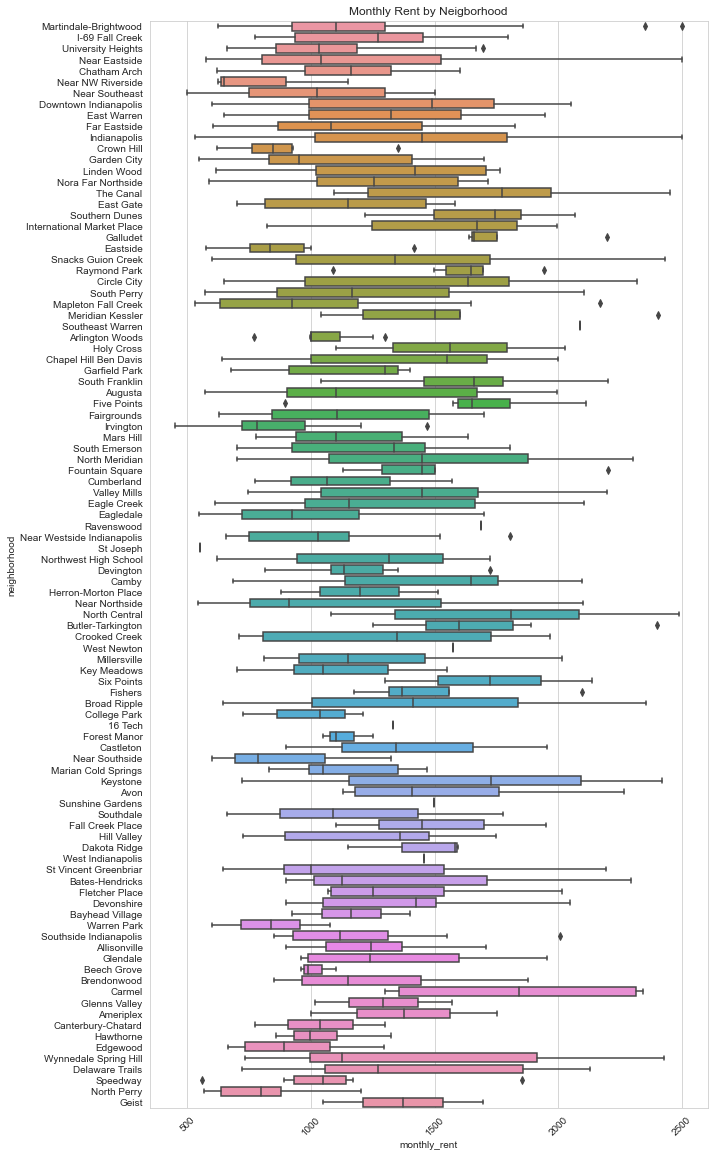

In [106]:
#Check how monthly rent changes by neighboorhod

ax, fig= plt.subplots(figsize=(10,20))

ax = sns.boxplot(data=df_final_final,  y='neighborhood', x='monthly_rent');

ax.set_title('Monthly Rent by Neigborhood')
plt.xticks(rotation=45);

Check the distribuation of the Numeric Features 

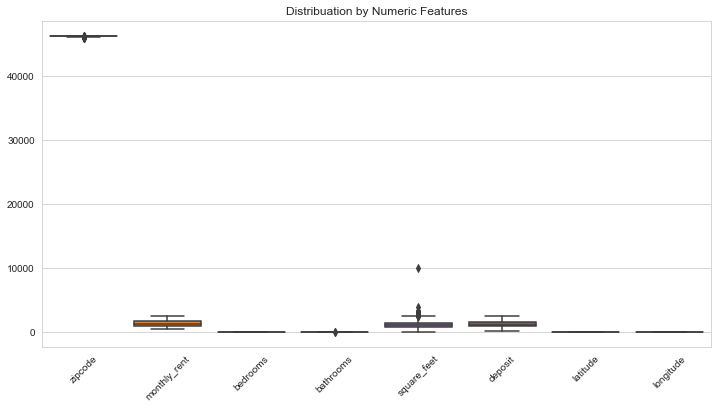

In [107]:


ax, fig= plt.subplots(figsize=(12,6))

ax= sns.boxplot(data=df_final_final);

ax.set_title('Distribuation by Numeric Features')
plt.xticks(rotation=45);

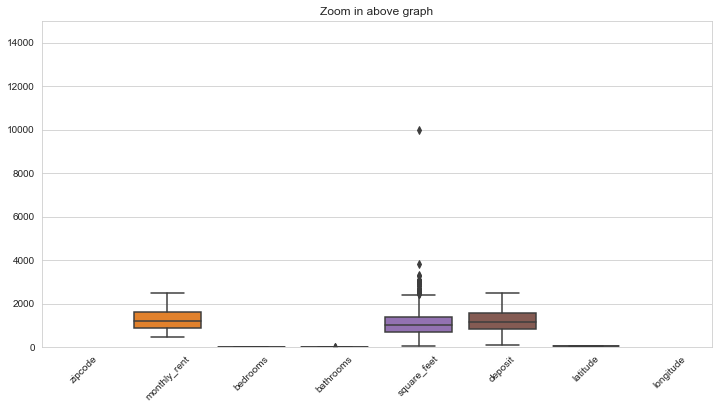

In [108]:
ax, fig= plt.subplots(figsize=(12,6))

ax= sns.boxplot(data=df_final_final);


ax.set_title('Zoom in above graph')

ax.set_ylim(0,15000)
plt.xticks(rotation=45);

Check the distribuation of the each numeric features

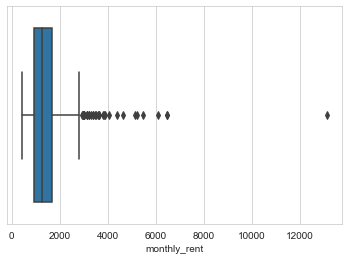

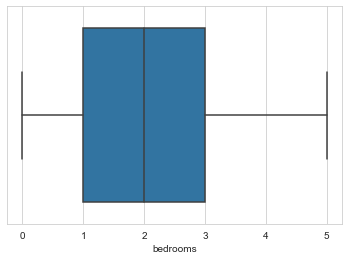

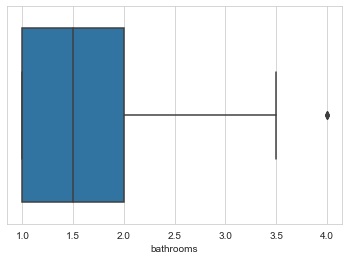

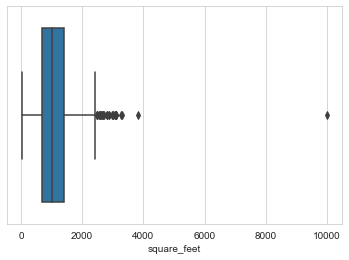

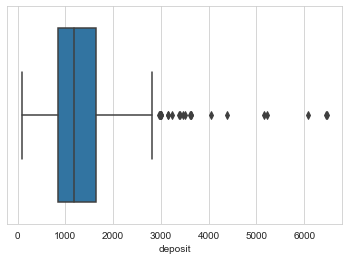

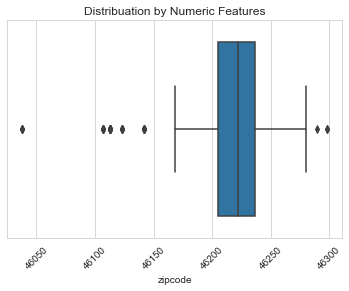

In [109]:
col_list=['monthly_rent', 'bedrooms', 'bathrooms', 'square_feet', 'deposit', 'zipcode']
for col in col_list:
    plt.figure()
    ax=sns.boxplot(df_final[col])
ax.set_title('Distribuation by Numeric Features')
plt.xticks(rotation=45);
plt.show()

Text(0.5, 1.0, 'Monthly Rent vs Bedrooms')

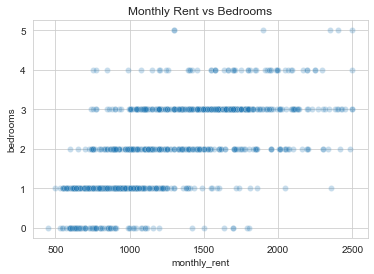

In [110]:
#Scatter plot shows the density of how the monthly rent and number of bedrooms are increased
ax = sns.scatterplot(data=df_final_final, x='monthly_rent', y='bedrooms',alpha=.25);
ax.set_title('Monthly Rent vs Bedrooms')

Text(0.5, 1.0, 'Monthly Rent vs Bathrooms')

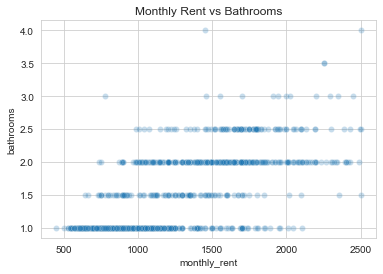

In [111]:
#How monthly rent changes among the number of bathrooms
ax = sns.scatterplot(data=df_final_final, x='monthly_rent', y='bathrooms',alpha=.25);
ax.set_title('Monthly Rent vs Bathrooms')

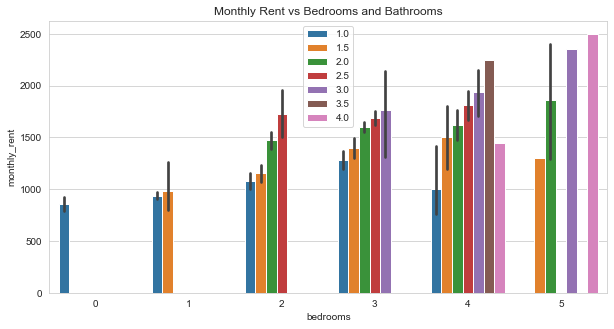

In [112]:
#This bar plot gives better understanding how the month rent increase when the number of bedrooms and bathrooms are increased.

ax, fig= plt.subplots(figsize=(10,5))
ax = sns.barplot(data=df_final_final, y='monthly_rent', x='bedrooms',hue = 'bathrooms');


ax.set_title('Monthly Rent vs Bedrooms and Bathrooms')
ax.legend()

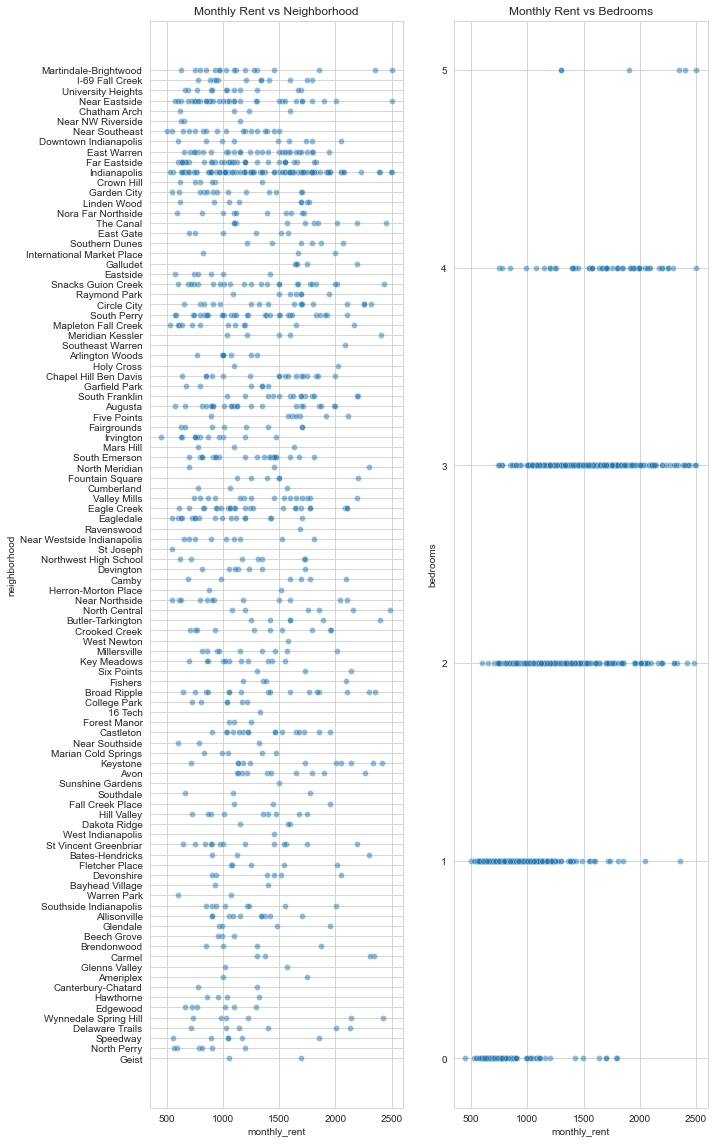

In [113]:
#Monthly rent also changes by neighborhood
fig,axes= plt.subplots(1,2,figsize=(10,20),sharey=False)

ax=sns.scatterplot(ax=axes[0],data=df_final_final, x='monthly_rent', y='neighborhood',alpha=.5);
ax.set_title('Monthly Rent vs Neighborhood');

ax=sns.scatterplot(ax=axes[1],data=df_final_final, x='monthly_rent', y='bedrooms',alpha=.5);
ax.set_title('Monthly Rent vs Bedrooms');



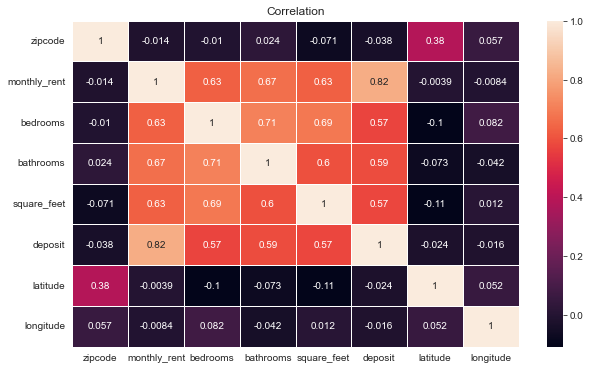

In [114]:
#Heat plot shows which columns are more correlated
ax, fig= plt.subplots(figsize=(10,6))
ax= sns.heatmap(data=df_final_final.corr(), annot=True, linewidth=1);


ax.set_title('Correlation');

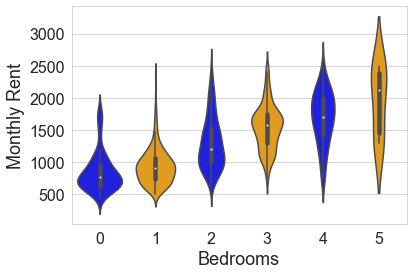

In [115]:
#Violin plot gives a smooth contour and works better for this many data points as opposed to swarmplot.
sns.violinplot(data=df_final_final,
               x = 'bedrooms',
               y = 'monthly_rent',
            palette=['blue', 'orange'])

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel("Bedrooms", fontsize=18)
plt.ylabel("Monthly Rent", fontsize=18)

plt.show()

In [116]:
df_final_final.head()

,url,listing_id,zipcode,monthly_rent,bedrooms,bathrooms,square_feet,walk_score,transit_score,deposit,latitude,longitude,neighborhood
0,https://www.apartments.com/2372-beckwith-dr-in...,ze0jqwy,46218,751,2,1.000,679.000,25,33,705,39.801,-86.126,Martindale-Brightwood
3,https://www.apartments.com/7491-n-shadeland-av...,s34dq64,46250,1795,3,2.000,2500.000,54,33,1795,39.890,-86.045,I-69 Fall Creek
4,https://www.apartments.com/nice-3-bedroom-ranc...,n669z9m,46237,1095,3,1.000,1439.000,29,32,1095,39.722,-86.121,University Heights
5,https://www.apartments.com/1102-n-oakland-ave-...,c4kr5zf,46201,1300,3,1.500,1500.000,67,38,800,39.783,-86.113,Near Eastside
6,https://www.apartments.com/634-e-10th-st-india...,rl2dfp0,46202,1600,2,2.000,1400.000,74,53,1600,39.781,-86.146,Chatham Arch


In [117]:
#Check the frequency of the neighborhood
for neighbor in np.unique(df_final_final.neighborhood):
    print(neighbor,':', len(df_final_final[df_final_final.neighborhood == neighbor]))

16 Tech : 1
Allisonville : 10
Ameriplex : 2
Arlington Woods : 8
Augusta : 23
Avon : 10
Bates-Hendricks : 3
Bayhead Village : 2
Beech Grove : 3
Brendonwood : 4
Broad Ripple : 16
Butler-Tarkington : 6
Camby : 6
Canterbury-Chatard : 2
Carmel : 4
Castleton : 16
Chapel Hill Ben Davis : 17
Chatham Arch : 4
Circle City : 17
College Park : 6
Crooked Creek : 10
Crown Hill : 6
Cumberland : 3
Dakota Ridge : 3
Delaware Trails : 6
Devington : 7
Devonshire : 6
Downtown Indianapolis : 9
Eagle Creek : 24
Eagledale : 17
East Gate : 6
East Warren : 28
Eastside : 6
Edgewood : 6
Fairgrounds : 8
Fall Creek Place : 3
Far Eastside : 31
Fishers : 4
Five Points : 7
Fletcher Place : 5
Forest Manor : 3
Fountain Square : 6
Galludet : 5
Garden City : 13
Garfield Park : 6
Geist : 2
Glendale : 4
Glenns Valley : 2
Hawthorne : 4
Herron-Morton Place : 2
Hill Valley : 9
Holy Cross : 2
I-69 Fall Creek : 12
Indianapolis : 81
International Market Place : 3
Irvington : 12
Key Meadows : 11
Keystone : 11
Linden Wood : 8
Maple

In [118]:
#Save the cleaned data as an apartments_final.csv
df_final_final.to_csv (r'apartments_final.csv', index = False, header=True)